In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.metrics as mt
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [108]:
X = df.iloc[:,[0,1,2,3,4,5,9]]

In [98]:
tscv = TimeSeriesSplit(n_splits=2)

In [6]:
cycle, trend = sm.tsa.filters.hpfilter(realgdp,1600)

In [2]:
df = pd.read_excel("C:/Users/seongsh/Desktop/bt/making_index.xlsx",sheet_name=0,index_col =0, header=0)

In [151]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [154]:
X = np.log(X.resample(rule='1m').last()).diff().dropna()
y = np.log(y.resample(rule='1m').last()).diff().dropna()

In [117]:
X = np.log(X).diff().dropna()
y = np.log(y).diff().drona()

AttributeError: 'Series' object has no attribute 'drona'

In [156]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train)

            M2% YOY Index  CSI BARC Index  GSUSFCI Index  NAPMEXPT Index  \
2005-03-31      -0.101096        0.295947       0.003015       -0.025091   
2005-04-30      -0.088947        0.187964       0.000802        0.033902   
2005-05-31      -0.264693        0.000000      -0.001003       -0.030278   
2005-06-30       0.141079       -0.025908      -0.002110       -0.077033   
2005-07-31       0.051293       -0.165147      -0.000604        0.086034   
...                   ...             ...            ...             ...   
2010-09-30       0.105361       -0.124273      -0.006072       -0.032671   
2010-10-31       0.095310       -0.122520      -0.001699        0.069485   
2010-11-30      -0.030772        0.085942       0.002198       -0.042186   
2010-12-31       0.117783       -0.189405      -0.003499       -0.072590   
2011-01-31       0.177681       -0.145108      -0.000802        0.181356   

            CONSSENT Index  CONSEXP Index  OEUSDHAO Index  OEA5DHAO Index  \
2005-03-31

In [155]:
params = {
    'n_estimators':(100, 200),
    'max_depth' : (2, 8),
    'min_samples_leaf' : (1, 5),
    'min_samples_split' : (2, 6),
    'max_features':[2,3,4,5,6]
}

In [157]:
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
최적 예측 정확도: 0.3193


In [158]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=8, max_features = 3,min_samples_leaf=1, min_samples_split=6 ,n_estimators=200)
rf_run.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, max_features=3, min_samples_split=6,
                      n_estimators=200, random_state=0)

In [159]:
train_predict = rf_run.predict(X_train)

In [160]:
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )

RMSE':0.0005507092372071868


In [168]:
train_predict = rf_run.predict(X_test)

In [169]:
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_test))) )

RMSE':0.007706035139730527


<AxesSubplot:>

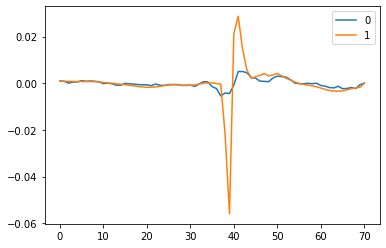

In [171]:
pd.DataFrame([train_predict,y_test]).transpose().plot()

In [176]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.553047,0.026269,0.056908,0.002550,2,2,1,2,100,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.221301,0.057068,0.139184,0.082117,80
1,1.002748,0.030291,0.099549,0.006522,2,2,1,2,200,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.224459,0.073212,0.148836,0.075623,79
2,0.530371,0.003539,0.060687,0.000762,2,2,1,6,100,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.223466,0.164114,0.193790,0.029676,71
3,1.061600,0.064419,0.091109,0.004040,2,2,1,6,200,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.227605,0.150714,0.189159,0.038446,74
4,0.537489,0.001651,0.061774,0.003914,2,2,5,2,100,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.198324,0.334015,0.266169,0.067846,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.044916,0.051902,0.101783,0.008986,8,6,1,6,200,"{'max_depth': 8, 'max_features': 6, 'min_sampl...",0.373686,0.061443,0.217565,0.156121,65
76,0.448009,0.036942,0.062057,0.001946,8,6,5,2,100,"{'max_depth': 8, 'max_features': 6, 'min_sampl...",0.353443,-0.018577,0.167433,0.186010,75
77,0.986422,0.013949,0.065789,0.003039,8,6,5,2,200,"{'max_depth': 8, 'max_features': 6, 'min_sampl...",0.350281,-0.034402,0.157940,0.192342,77
78,0.517748,0.002358,0.051003,0.000125,8,6,5,6,100,"{'max_depth': 8, 'max_features': 6, 'min_sampl...",0.353443,-0.018577,0.167433,0.186010,75


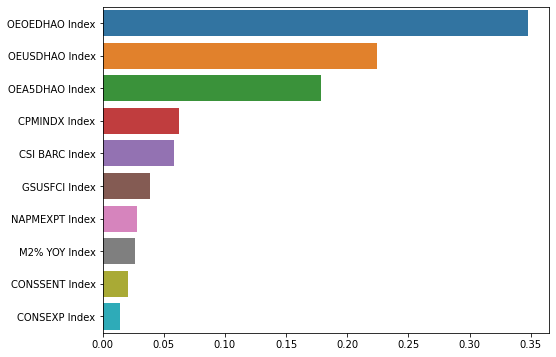

In [172]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


In [28]:
cycle, trend = sm.tsa.filters.hpfilter(df.iloc[:,0],144000000)

<AxesSubplot:>

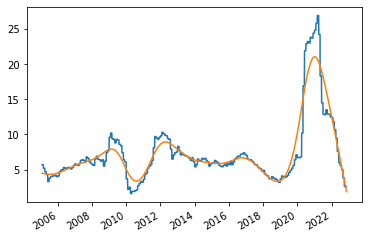

In [29]:
df.iloc[:,0].plot()
trend.plot()

In [33]:
import numpy as np

In [46]:
cycle, trend  = sm.tsa.filters.hpfilter(np.log(df).iloc[:,0],10000000)

<AxesSubplot:>

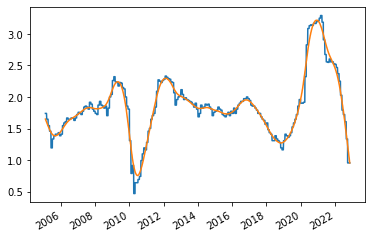

In [47]:
np.log(df).iloc[:,0].plot()
trend.plot()

FileNotFoundError: [Errno 2] No such file or directory: 'png/simple_kalman_filter.png'

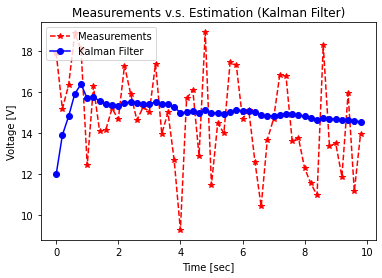

In [48]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
def get_volt():
    """Measure voltage."""
    v = np.random.normal(0, 2)   # v: measurement noise.
    volt_true = 14.4             # volt_true: True voltage [V].
    z_volt_meas = volt_true + v  # z_volt_meas: Measured Voltage [V] (observable).
    return z_volt_meas
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P
# Input parameters.
time_end = 10
dt = 0.2
# Initialization for system model.
A = 1
H = 1
Q = 0
R = 4
# Initialization for estimation.
x_0 = 12  # 14 for book.
P_0 = 6
time = np.arange(0, time_end, dt)
n_samples = len(time)
volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)
x_esti, P = None, None
for i in range(n_samples):
    z_meas = get_volt()
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti
plt.plot(time, volt_meas_save, 'r*--', label='Measurements')
plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter')
plt.legend(loc='upper left')
plt.title('Measurements v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')
plt.savefig('png/simple_kalman_filter.png')